In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Suggested citation: Velarde, G.,  Brañez, P., Bueno, A., Heredia, R., & Lopez, M. (Submitted). An Open-Source and Reproducible Implementation of GRU and LSTM Networks for Financial Time Series Forecasting. Submitted to ITISE CONFERENCE: 8th International Conference on Time Series and Forecasting, June 27th-30th, 2022.

MIT License

Copyright (c) [2021] [Pedro Brañez, Alejandro Bueno, Rodrigo Heredia, Mateo Lopez & Gissel Velarde]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [2]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from numpy import genfromtxt
from pandas_datareader import data as pdr
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Definitions

In [3]:
#LSTM 2 layers
def LSTM_Model():
  model = Sequential()
  model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1],1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dropout(rate=0.4, seed=1))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')
  model.summary()
  return model

In [4]:
#GRU 2 layers
def GRU_Model():
  model = Sequential()
  model.add(GRU(64, return_sequences=True, input_shape=(X.shape[1],1)))
  model.add(GRU(64, return_sequences=False))
  model.add(Dropout(rate=0.4, seed=1))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')
  model.summary()
  return model

In [5]:
#Data preparation based on: https://youtu.be/QIUxPv5PJOY?t=1018
def data_preparation(window, scaled_data, training_data_len):
  X=[]
  Y=[]

  for i in range(window,len(scaled_data)):
    X.append(scaled_data[i-window:i, 0])
    Y.append(scaled_data[i, 0])

  X = np.array(X)
  Y = np.array(Y)
  X = np.reshape(X, (X.shape[0],X.shape[1],1))

  trainX, trainY = X[:training_data_len], Y[:training_data_len]
  testX, testY = X[training_data_len:], Y[training_data_len:]
  return trainX, trainY, testX, testY, X

In [6]:
#https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib
#This code is to plot series of different colors
def plot_series(X):
  x = np.arange(10)
  ys = [i+x+(i*x)**2 for i in range(10)]
  colors = cm.rainbow(np.linspace(0, 1, len(ys)))
  for i in range(10):
    plt.plot(X[i], label='%s ' % (i+1), color=colors[i,:])
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
  plt.xlabel("Days")
  plt.ylabel("Closing Price")

In [7]:
#Retrieve BANKEX dataset (normalized data)
BANKEX = genfromtxt('BANKEX.csv', delimiter=',')

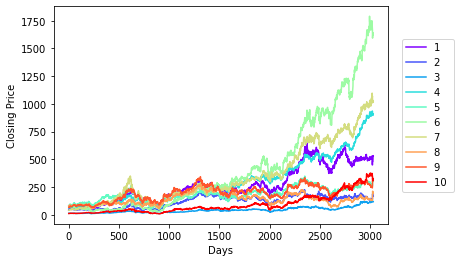

In [8]:
plot_series(BANKEX)

In [9]:
#Normalize data between 0 and 1
for i in range(BANKEX.shape[0]):
   BANKEX[i,:] = (BANKEX[i,:]-BANKEX[i,:].min())/(BANKEX[i,:].max()-BANKEX[i,:].min())

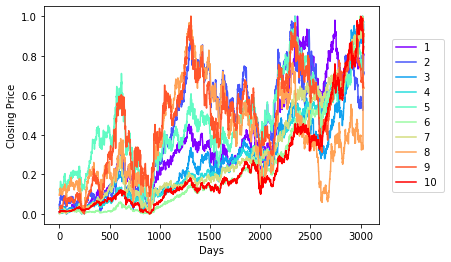

In [10]:
plot_series(BANKEX)

In [11]:
selected_series = 0 #Select one signal arbitrarily to train the dataset
scaled_data = BANKEX[selected_series, :] 

In [12]:
scaled_data = np.reshape(scaled_data, (len(scaled_data),1)) 
scaled_data.shape

(3032, 1)

In [13]:
window = 60 #Size of the window in days
test_samples = 251 #Number of test samples
training_data_len = len(scaled_data) - test_samples - window 

In [14]:
trainX, trainY, testX, testY, X = data_preparation(window, scaled_data, training_data_len)

In [15]:
gru_model = GRU_Model()
lstm_model = LSTM_Model()

batch_size = 64
epochs = 300

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 64)            12864     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (

In [16]:
# Train LSTM mdodel
lstm_trained = lstm_model.fit(trainX, trainY, shuffle=False, batch_size=batch_size, epochs=epochs)

# Train GRU mdodel
gru_trained = gru_model.fit(trainX, trainY, shuffle=False, batch_size=batch_size, epochs=epochs)

Epoch 1/300
43/43 [==============================] - 8s 87ms/step - loss: 0.0128
Epoch 2/300
43/43 [==============================] - 4s 85ms/step - loss: 0.0104
Epoch 3/300
43/43 [==============================] - 4s 83ms/step - loss: 0.0094
Epoch 4/300
43/43 [==============================] - 4s 92ms/step - loss: 0.0072
Epoch 5/300
43/43 [==============================] - 4s 84ms/step - loss: 0.0044
Epoch 6/300
43/43 [==============================] - 4s 84ms/step - loss: 0.0035
Epoch 7/300
43/43 [==============================] - 4s 86ms/step - loss: 0.0046
Epoch 8/300
43/43 [==============================] - 4s 84ms/step - loss: 0.0042
Epoch 9/300
43/43 [==============================] - 4s 83ms/step - loss: 0.0041
Epoch 10/300
43/43 [==============================] - 4s 84ms/step - loss: 0.0037
Epoch 11/300
43/43 [==============================] - 4s 84ms/step - loss: 0.0034
Epoch 12/300
43/43 [==============================] - 4s 84ms/step - loss: 0.0036
Epoch 13/300
43/43 [=====

In [17]:
#Testing
s=(10,2) 
s=np.ones(s)  #For the results

for j in range(0,10):
  scaled_data = BANKEX[j, :] #Changes the index of time_series
  scaled_data = np.reshape(scaled_data, (len(scaled_data),1)) #(3035, 1)
  scaled_data.shape
  _ , _ , testX, testY, _ = data_preparation(window, scaled_data, training_data_len)
  y_pred_gru = gru_model.predict(testX)
  y_pred_lstm = lstm_model.predict(testX)
  print(testY.shape)
  s[j,0] = np.sqrt(mean_squared_error(testY, y_pred_lstm))
  s[j,1] = np.sqrt(mean_squared_error(testY, y_pred_gru))

(251,)
(251,)
(251,)
(251,)
(251,)
(251,)
(251,)
(251,)
(251,)
(251,)


In [18]:
s

array([[0.0248501 , 0.02819328],
       [0.0332694 , 0.03665182],
       [0.0238704 , 0.02769326],
       [0.01837784, 0.02207185],
       [0.0260192 , 0.02942302],
       [0.02035776, 0.02391585],
       [0.01963848, 0.02315195],
       [0.0321483 , 0.03860808],
       [0.02955588, 0.03227152],
       [0.02271325, 0.02592309]])

In [19]:
np.mean(s, axis=0)

array([0.02508006, 0.02879037])

In [20]:
np.std(s, axis=0)

array([0.00491822, 0.00530265])

Text(0, 0.5, 'Closing Price')

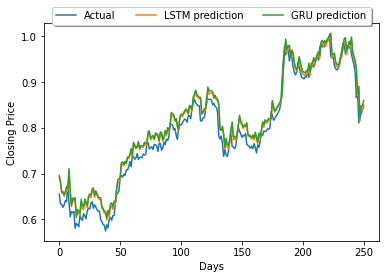

In [21]:
#"""Plot Actual Closing Price and Predictions"""

plt.plot(testY, label = 'Actual')
plt.plot(y_pred_lstm, label = 'LSTM prediction')
plt.plot(y_pred_gru, label = 'GRU prediction')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, ncol=5)
plt.xlabel("Days")
plt.ylabel("Closing Price")

Text(0, 0.5, 'MSE Loss')

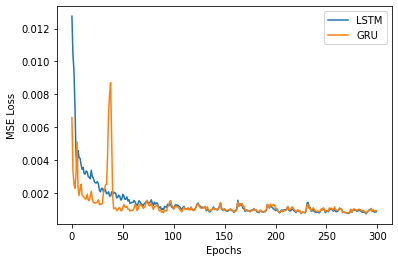

In [22]:
#"""Plot loss function and Predictions"""

plt.plot(lstm_trained.history['loss'], label = 'LSTM')
plt.plot(gru_trained.history['loss'], label = 'GRU')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')